## Exploratory Data Analysis

## Information:
* `Gala Groceries` is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores.

* They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

* Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

* This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

### Business Problem:
Analyse the Gala Groceries data, summaraize the findings and provide some suggestions to fullfill the business problem.And Please draft an email containing this information to the Data Science team leader to review before we send it to the client.

## 1. Import Necessary Libraries:


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading and Undertsanding the Data

In [7]:
df=pd.read_csv("sample_sales_data.csv")
df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


## 3. Statisttical/Basic EDA

In [10]:
#Checking the shape 
df.shape

(7829, 10)

In [11]:
#Checking the Datatypes
df.dtypes

Unnamed: 0          int64
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [21]:
#Statistical Analysis
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


### Inference:
   It describes only numerical data not categorical data
* Mean - None of the features(unit_price,quantity,total) have mean is equal to 0 , so there is some skewness in the data  
* Standard Deviation - There is high deviation in the feature total

In [9]:
#Checking the null values
df.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

## 4. Main Exploratory Data Analysis

# Category

## The `Items` which has been ordered the most by `customers`

In [46]:
df['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

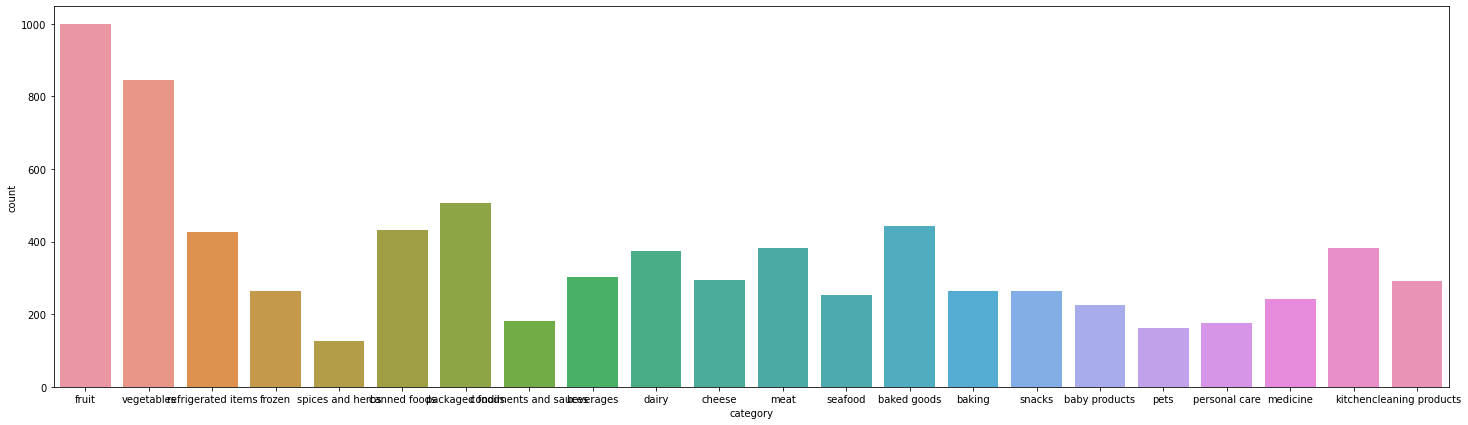

In [40]:
plt.figure(figsize=(25,7))
sns.countplot(x='category',data=df)

## Observation:
  * Here we can see that fruit, vegetables,packaged foods,and baked goods are `sold the most`
  * ANd spices and herbs, pets, personal care, condiments and sauces are `sold the least`

In [139]:
df.category.value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

## The Items which has been sold the most in `*Quantity*` 

<AxesSubplot:xlabel='quantity', ylabel='category'>

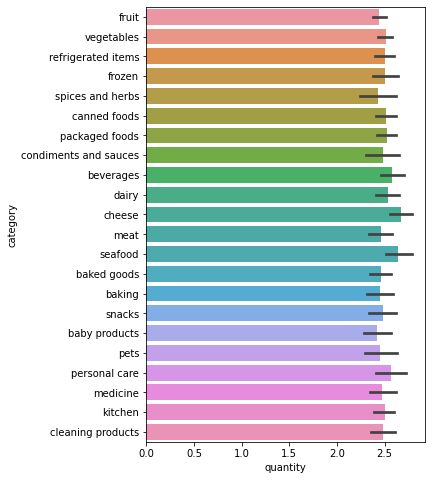

In [138]:
plt.figure(figsize=(5,8))
sns.barplot(x='quantity',y='category',data=df)

## Inference:
 *  The items which has been sold the most in `Quantity` are `Perosonal care,cheese,seafood`

## Customer Type

In [17]:
df['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

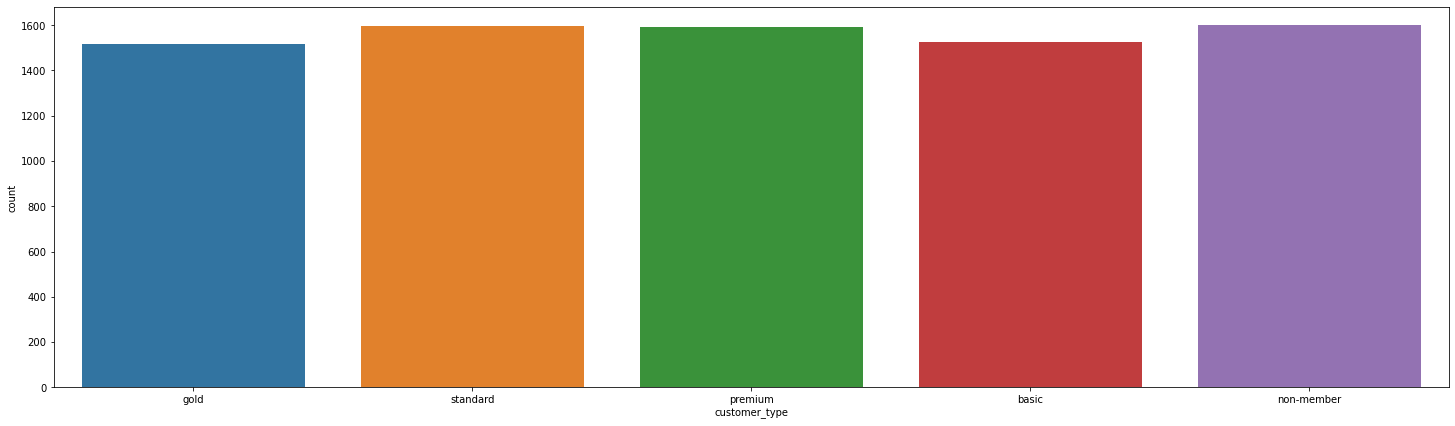

In [49]:
plt.figure(figsize=(25,7))
sns.countplot(x='customer_type',data=df)

In [18]:
df['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

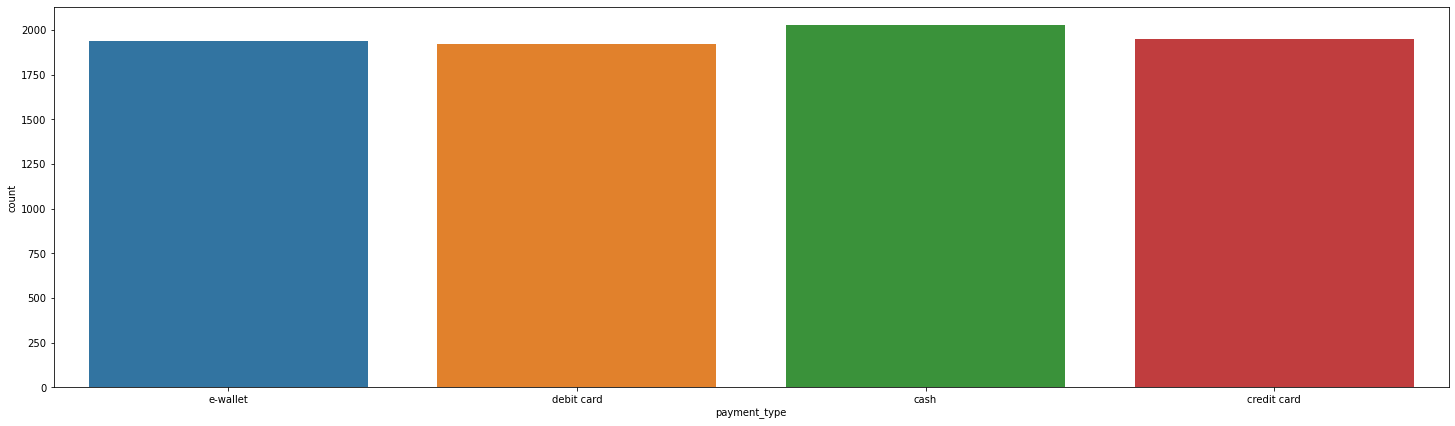

In [50]:
plt.figure(figsize=(25,7))
sns.countplot(x='payment_type',data=df)

### Inference:
  * We can infer that the cash payment was more than any other payment types

## The Items sold with high pay

In [48]:
df1=df.groupby(by='category')['total'].sum().sort_values(ascending=False).head() 
df1

category
kitchen      14456.65
meat         14102.31
seafood      10754.81
medicine     10393.78
beverages     9930.64
Name: total, dtype: float64

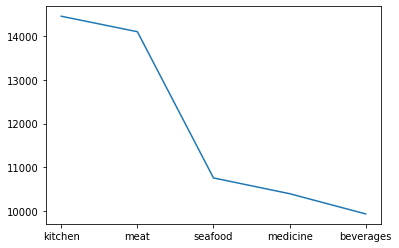

In [51]:
plt.plot(df1)

## Inference:
* Here we can observe that seafood, medicine and bevarages are very less when compared to meat and Kitchen items

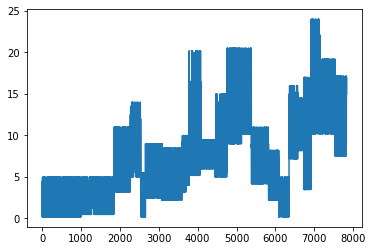

In [52]:
plt.plot(df.unit_price)

### Here am trying to filter those categories which are paid high by customers

In [76]:
High_payed = df[df['unit_price'] >= 10]
df2=High_payed[['category','unit_price']]

In [77]:
df2

,category,unit_price
1850,refrigerated items,10.99
1859,refrigerated items,10.99
1860,refrigerated items,10.99
1868,refrigerated items,10.99
1873,refrigerated items,10.99
...,...,...
7824,cleaning products,14.19
7825,cleaning products,16.99
7826,cleaning products,14.19
7827,cleaning products,16.99


## Items sold with high pay range

<AxesSubplot:xlabel='category', ylabel='unit_price'>

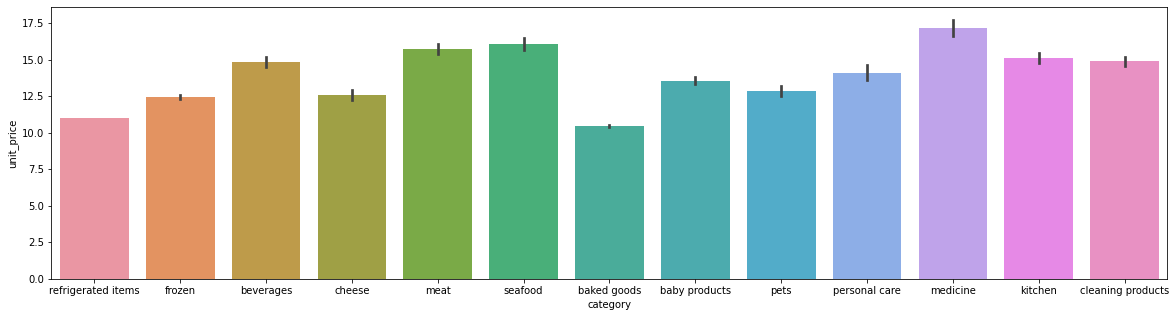

In [81]:
plt.figure(figsize=(20,5))
sns.barplot(x='category',y='unit_price',data=df2)

## Inference:
 * These are the highly sold items

In [83]:
low_payed = df[df['unit_price'] < 10]
df3=low_payed[['category','unit_price']]

In [84]:
df3

,category,unit_price
0,fruit,3.99
1,fruit,3.99
2,fruit,0.19
3,fruit,0.19
4,fruit,4.49
...,...,...
7815,cleaning products,9.49
7816,cleaning products,8.99
7817,cleaning products,9.49
7818,cleaning products,8.99


## Items Sold with low pay range

<AxesSubplot:xlabel='category', ylabel='unit_price'>

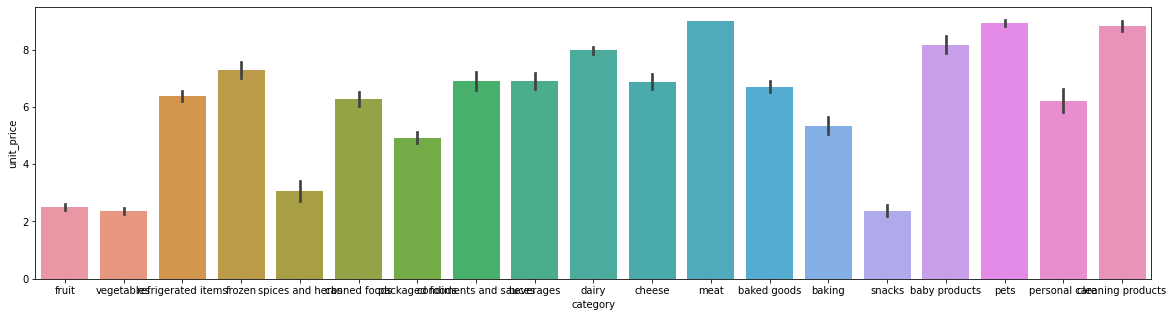

In [85]:
plt.figure(figsize=(20,5))
sns.barplot(x='category',y='unit_price',data=df3)

## Visualizing the mostly sold items according to the customer type

In [106]:
df.customer_type.value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

## Gold type customer

In [104]:
df4=df[df['customer_type']=='gold']

<AxesSubplot:xlabel='category', ylabel='count'>

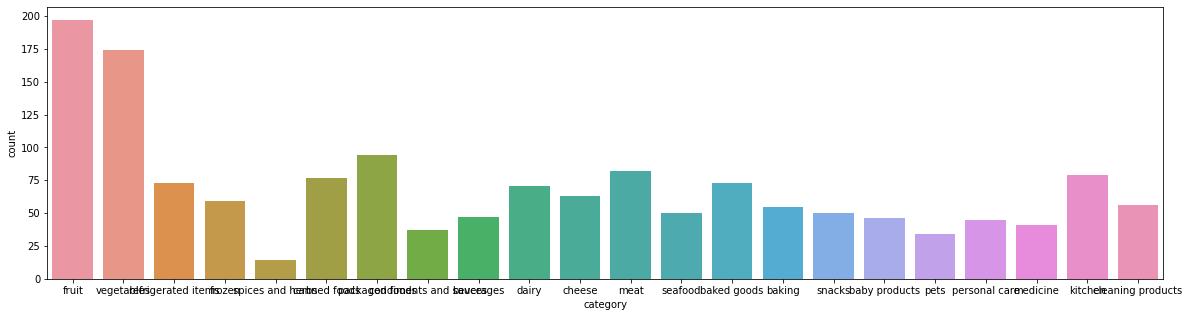

In [103]:
plt.figure(figsize=(20,5))
sns.countplot(x='category',data=df4)

<AxesSubplot:xlabel='customer_type', ylabel='unit_price'>

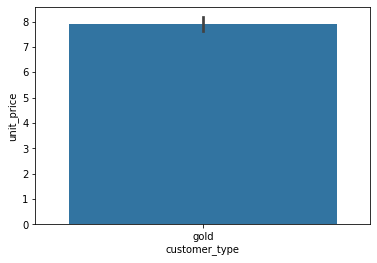

In [109]:
sns.barplot(x='customer_type',y='unit_price',data=df4)

## Inference:
  * Gold customers has brought fruits and vegitables the most

## non-member Customer type

In [111]:
df5=df[df['customer_type']=='non-member']

<AxesSubplot:xlabel='category', ylabel='count'>

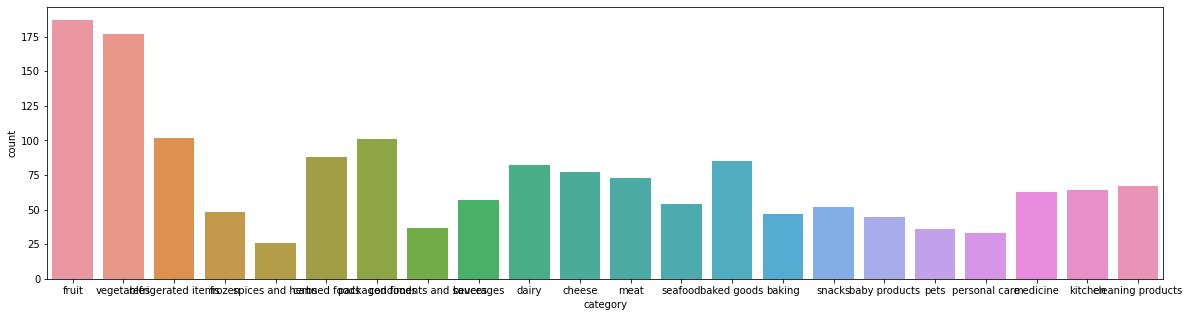

In [128]:
plt.figure(figsize=(20,5))
sns.countplot(x='category',data=df5)

<AxesSubplot:xlabel='customer_type', ylabel='unit_price'>

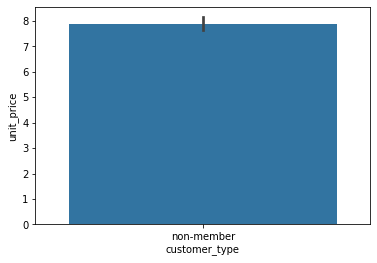

In [113]:
sns.barplot(x='customer_type',y='unit_price',data=df5)

## standard customer type

In [115]:
df6=df[df['customer_type']=='standard']

<AxesSubplot:xlabel='category', ylabel='count'>

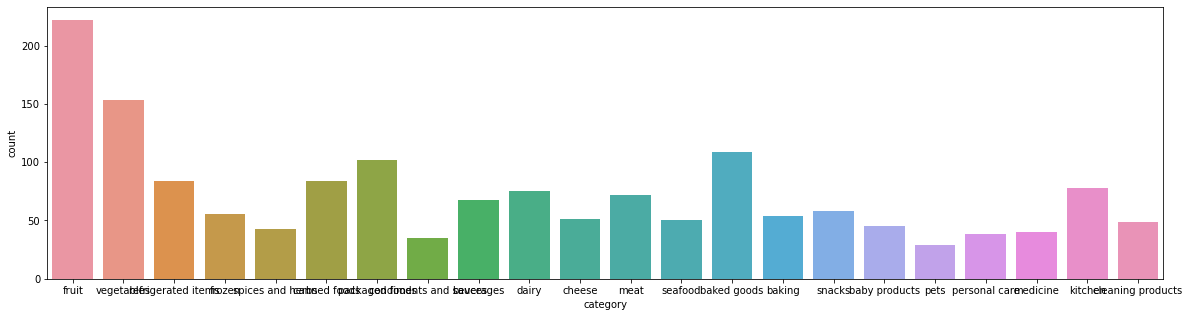

In [116]:
plt.figure(figsize=(20,5))
sns.countplot(x='category',data=df6)

<AxesSubplot:xlabel='customer_type', ylabel='unit_price'>

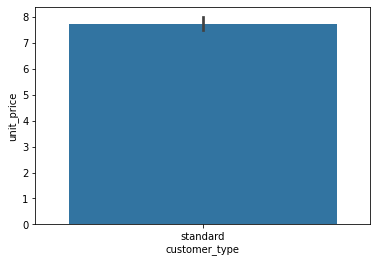

In [117]:
sns.barplot(x='customer_type',y='unit_price',data=df6)

## premium customer type

In [119]:
df7=df[df['customer_type']=='standard']

<AxesSubplot:xlabel='category', ylabel='count'>

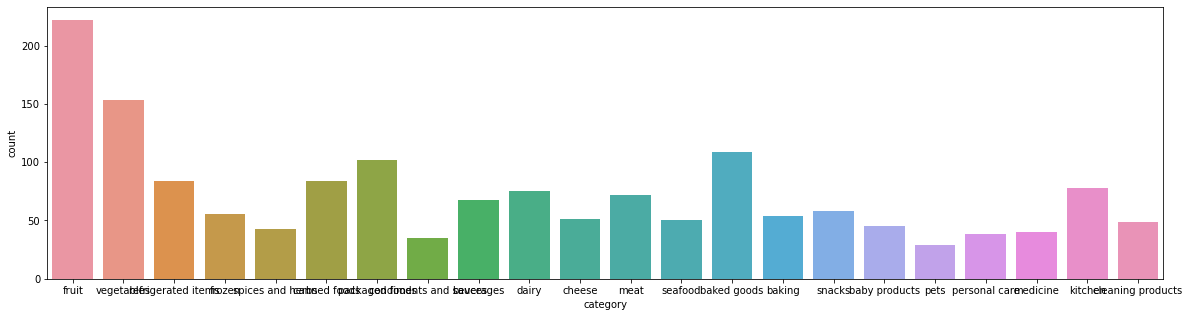

In [122]:
plt.figure(figsize=(20,5))
sns.countplot(x='category',data=df7)

## basic Customer

In [124]:
df8=df[df['customer_type']=='basic']

<AxesSubplot:xlabel='category', ylabel='count'>

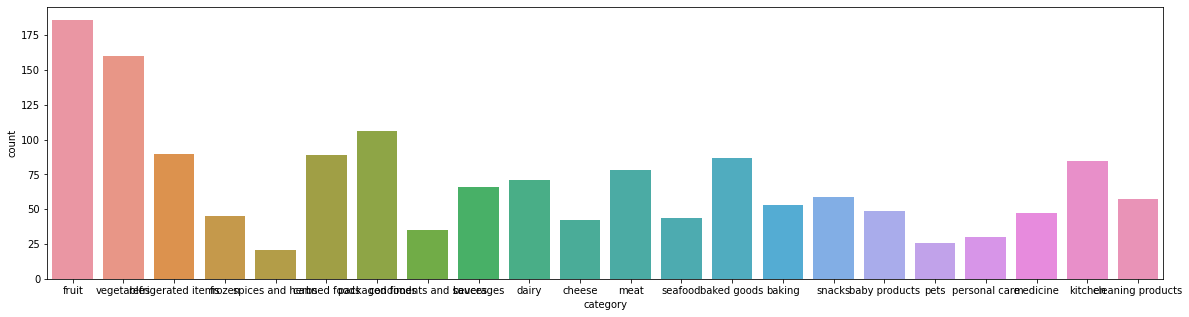

In [125]:
plt.figure(figsize=(20,5))
sns.countplot(x='category',data=df8)

In [130]:
df.category.value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [87]:
df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


## 5 - Summary
We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

"How to better stock the items that they sell"

## `Insights to benifit the client`

## 1. The Items which has been sold the least 

* **spices and herbs, pets, personal care, condiments and sauces** are `sold the least` by customers 
So we can `decrease the stock` of products as there are `very less customers` are willing to buy those items

## 2. The Items that has been sold the most in Quantity
* The items which has been sold the most in Quantity are **Perosonal care,cheese,seafood**. So we can `increase the stock quantity` as the `most of the customers` are willing to buy these items the most

## 3. Cash Payment customers are more than other payment type customers

## 4. Kitchen and Meat are the most costly items that a customer is willing to buy

# `Thank You`